# monoynaptic

Code to organize monosynaptic results and to make example/comparison figures

data (ccgs, transmission probability, connection detection, manual curation, ect. ) was generated using tools from CellExplorer https://github.com/petersenpeter/CellExplorer

In [1]:
%cd ..

D:\ryanh\github\cell_assembly_replay


In [2]:
from cell_assembly_replay import functions
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

%matplotlib inline
import os
import sys

import pandas as pd
from scipy import stats


## load df contain monosynaptic results from cell-explorer

each row is a significant connection (excitatory or inhibitory) which has been manually curated

In [3]:
df = pd.read_csv(r'F:\Projects\PAE_PlaceCell\analysis\monosynaptic\post_processed\monosynaptic_df.csv')  
df

,Unnamed: 0,session,trans_prob,type,ref,target,area_ref,cell_type_ref,tetrode_ref,cell_num_ref,area_target,cell_type_target,tetrode_target,cell_num_target,group,rat,area
0,0,LEM3116_S20180715121821,0.142015,excitatory,21,23,ca1,pyr,TT7.mat,4,ca1,pyr,TT7.mat,6,control,LEM3116,ca1
1,1,LEM3116_S20180715121821,0.008063,excitatory,23,20,ca1,pyr,TT7.mat,6,ca1,pyr,TT7.mat,3,control,LEM3116,ca1
2,2,LEM3116_S20180716174306,0.027464,excitatory,34,29,ca1,pyr,TT7.mat,5,ca1,int,TT6.mat,4,control,LEM3116,ca1
3,3,LEM3116_S20180717110938,0.006824,excitatory,12,47,ca1,pyr,TT1.mat,12,ca1,int,TT5.mat,3,control,LEM3116,ca1
4,4,LEM3116_S20180717110938,0.020557,excitatory,13,47,ca1,pyr,TT1.mat,13,ca1,int,TT5.mat,3,control,LEM3116,ca1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1856,RH16_S20161017151810,0.003393,inhibitory,8,5,ca1,int,TT6.mat,1,ca1,pyr,TT3.mat,1,pae,RH16,ca1
1857,1857,RH16_S20161017151810,0.107421,inhibitory,9,12,ca1,pyr,TT7.mat,1,ca1,int,TT7.mat,4,pae,RH16,ca1
1858,1858,RH16_S20161017151810,0.000931,inhibitory,12,9,ca1,int,TT7.mat,4,ca1,pyr,TT7.mat,1,pae,RH16,ca1
1859,1859,RH16_S20161025160727,0.301325,excitatory,21,20,ca1,pyr,TT8.mat,3,ca1,pyr,TT8.mat,2,pae,RH16,ca1


## add group and rat ID

In [4]:
def add_group_affiliation(df):
    control=('RH13','RH14','LS21','LS23','LE2821','LE2823','LEM3116','LEM3120','LEM3216')
    pae=('RH11','RH16','LS17','LS19','LE2813','LEM3124','LEM3206','LEM3246')

    df['group'] = np.ones_like(df.session)

    regstr = '|'.join(control)
    idx = df['session'].str.upper().str.contains(regstr)    
    df.loc[idx,'group'] = 'control'

    regstr = '|'.join(pae)
    idx = df['session'].str.upper().str.contains(regstr)    
    df.loc[idx,'group'] = 'pae'
    return df

df = add_group_affiliation(df)

rat = [s.split('_')[0] for s in df.session]
df['rat']=rat
df

,Unnamed: 0,session,trans_prob,type,ref,target,area_ref,cell_type_ref,tetrode_ref,cell_num_ref,area_target,cell_type_target,tetrode_target,cell_num_target,group,rat,area
0,0,LEM3116_S20180715121821,0.142015,excitatory,21,23,ca1,pyr,TT7.mat,4,ca1,pyr,TT7.mat,6,control,LEM3116,ca1
1,1,LEM3116_S20180715121821,0.008063,excitatory,23,20,ca1,pyr,TT7.mat,6,ca1,pyr,TT7.mat,3,control,LEM3116,ca1
2,2,LEM3116_S20180716174306,0.027464,excitatory,34,29,ca1,pyr,TT7.mat,5,ca1,int,TT6.mat,4,control,LEM3116,ca1
3,3,LEM3116_S20180717110938,0.006824,excitatory,12,47,ca1,pyr,TT1.mat,12,ca1,int,TT5.mat,3,control,LEM3116,ca1
4,4,LEM3116_S20180717110938,0.020557,excitatory,13,47,ca1,pyr,TT1.mat,13,ca1,int,TT5.mat,3,control,LEM3116,ca1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1856,RH16_S20161017151810,0.003393,inhibitory,8,5,ca1,int,TT6.mat,1,ca1,pyr,TT3.mat,1,pae,RH16,ca1
1857,1857,RH16_S20161017151810,0.107421,inhibitory,9,12,ca1,pyr,TT7.mat,1,ca1,int,TT7.mat,4,pae,RH16,ca1
1858,1858,RH16_S20161017151810,0.000931,inhibitory,12,9,ca1,int,TT7.mat,4,ca1,pyr,TT7.mat,1,pae,RH16,ca1
1859,1859,RH16_S20161025160727,0.301325,excitatory,21,20,ca1,pyr,TT8.mat,3,ca1,pyr,TT8.mat,2,pae,RH16,ca1


In [5]:
df['area'] = df.area_target

## save df with new columns

In [77]:
df.to_csv(r'F:\Projects\PAE_PlaceCell\analysis\monosynaptic\post_processed\monosynaptic_df.csv')

## plotting helpers

In [174]:
group_colors = {"controlca1": '#222629ff',
                "controlca3": '#103876ff',
                'paeca1': '#ff5240ff',
                'paeca3': '#ebad46ff'} 
def ecdf(x):
    xs = np.sort(x)
    ys = np.linspace(0,1,len(xs))
    return xs, ys


def plot_ecdf(var,df,area,ax,group_colors):
    for rat in pd.unique(df.rat):
        y = df[(df.rat == rat) & (df.area == area)]
        if y.empty == False:
            xs, ys = ecdf(y[var])
            ax.plot(xs,ys,color=group_colors[y.group.iloc[0]+y.area.iloc[0]],linewidth=.5)
#             ax.scatter(xs,ys,color=group_colors[y.group.iloc[0]+y.area.iloc[0]],s=.1)
            
def make_x_same_range(axs,ax_num):
    axs[ax_num[0]].set_xlim(min(axs[ax_num[0]].get_xlim()[0],axs[ax_num[1]].get_xlim()[0]),
                            max(axs[ax_num[0]].get_xlim()[1],axs[ax_num[1]].get_xlim()[1]))
    axs[ax_num[1]].set_xlim(min(axs[ax_num[0]].get_xlim()[0],axs[ax_num[0]].get_xlim()[0]),
                            max(axs[ax_num[0]].get_xlim()[1],axs[ax_num[1]].get_xlim()[1]))

In [175]:
fig_save_path = r'D:\ryanh\GoogleDrive\school_work\UNM\Lab\Projects\Dissertation\dissertation\inkscape_figs\monosynaptic_section'

# example ccgs

## load data

In [8]:
data_path = r'F:\Projects\PAE_PlaceCell\analysis\monosynaptic\post_processed'
ccg = np.load(os.path.join(data_path,'ccg.npy'))
lower_bound = np.load(os.path.join(data_path,'lower_bound.npy'))
upper_bound = np.load(os.path.join(data_path,'upper_bound.npy'))
print(ccg.shape)
print(lower_bound.shape)
print(upper_bound.shape)

(1861, 301)
(1861, 301)
(1861, 301)


In [71]:
def plot_ccg(ccg,upper_bound,lower_bound,ax,duration=0.12,dt=0.0004):
    lag = np.arange(-duration/2,(duration/2)+dt,dt)
    # plot ccg
    ax.bar(lag,ccg,width=dt,color='k')
    # plot sig bounds
    ax.plot(lag,upper_bound,color='green',linestyle = '--',linewidth = 1)
    ax.plot(lag,lower_bound,color='green',linestyle = '--',linewidth = 1)

    ax.axvline(0, linestyle = '--', linewidth = 1, alpha = 1, color = 'grey')
    ax.set_xlim(-duration/2,duration/2)
    ax.set_xlabel('lag time (sec)')
    
def get_connection_symbols(df,ccg_n):
    if df.cell_type_ref.iloc[ccg_n] == 'int':
        ref = '●'
    else:
        ref = '\u0394'

    if df.cell_type_target.iloc[ccg_n] == 'int':
        target = '●'
    else:
        target = '\u0394'  
    return ref,target       

In [143]:
for ccg_n in np.where((df.group == 'control') & (df.type == 'inhibitory') & (df.area == 'ca3'))[0]:
    ax = plt.subplot(111)
    plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],ax)    
    ax.set_xlim(-.01,0.01)
    ref, target = get_connection_symbols(df,ccg_n)
    ax.set_title(ref+' \u2192 '+target)
    
    plt.savefig(os.path.join(fig_save_path,'ccg_examples',df.group.iloc[ccg_n]+df.area.iloc[ccg_n]+'_'+df.session.iloc[ccg_n]+'_'+df.type.iloc[ccg_n]+str(ccg_n)+'.png'),dpi=300,bbox_inches='tight')  
    plt.close()

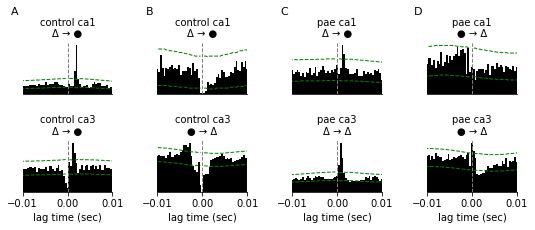

In [486]:
fig, axs = plt.subplots(2,4,figsize=functions.set_size('thesis', fraction=1.5, subplots=(2,4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.9, wspace=0.5)
axs = axs.ravel()

# control ca1 excitatory
ccg_n = 28
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[0])  
ref, target = get_connection_symbols(df,ccg_n)
axs[0].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# control ca1 inhibitory
ccg_n = 1847
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[1])    
ref, target = get_connection_symbols(df,ccg_n)
axs[1].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# pae ca1 excitatory
ccg_n = 1777
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[2])  
ref, target = get_connection_symbols(df,ccg_n)
axs[2].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# pae ca1 inhibitory
ccg_n = 1856
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[3])   
ref, target = get_connection_symbols(df,ccg_n)
axs[3].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# control ca3 excitatory
ccg_n = 50
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[4])
ref, target = get_connection_symbols(df,ccg_n)
axs[4].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# control ca3 inhibitory
ccg_n = 1681
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[5]) 
ref, target = get_connection_symbols(df,ccg_n)
axs[5].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# pae ca3 excitatory
ccg_n = 246
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[6])
ref, target = get_connection_symbols(df,ccg_n)
axs[6].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

# pae ca3 inhibitory
ccg_n = 202
plot_ccg(ccg[ccg_n,:],upper_bound[ccg_n,:],lower_bound[ccg_n,:],axs[7])   
ref, target = get_connection_symbols(df,ccg_n)
axs[7].set_title(df.group.iloc[ccg_n]+' '+df.area.iloc[ccg_n]+'\n'+ref+' \u2192 '+target,fontsize=10)

axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[3].axes.get_xaxis().set_ticks([])

axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')
axs[3].set_xlabel('')

for i in range(8):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    axs[i].spines["left"].set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].axes.get_yaxis().set_ticks([])
    axs[i].set_xlim(-.01,0.01)
 
for i, label in enumerate(('A','B', 'C', 'D')):
    axs[i].text(-0.05, 1.7, label, transform=axs[i].transAxes,fontsize=11, fontweight='normal', va='top', ha='right')
    
plt.savefig(os.path.join(fig_save_path,'ccg_examples.svg'),dpi=300,bbox_inches='tight')  


## compare transmission strengths

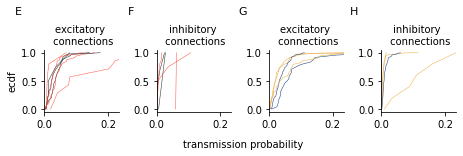

In [105]:
df2 = df[df.type == 'excitatory']

fig, axs = plt.subplots(1,4, figsize=functions.set_size('thesis', fraction=1.25, subplots=(1,4)), edgecolor='k')
fig.subplots_adjust(hspace = 1.2, wspace=0.5)
axs = axs.ravel()

ax_num = [0,2]
plot_ecdf('trans_prob',df2,'ca1',axs[ax_num[0]],group_colors)
axs[ax_num[0]].set_ylabel('ecdf')
plot_ecdf('trans_prob',df2,'ca3',axs[ax_num[1]],group_colors)

df2 = df[df.type == 'inhibitory']
ax_num = [1,3]
plot_ecdf('trans_prob',df2,'ca1',axs[ax_num[0]],group_colors)
plot_ecdf('trans_prob',df2,'ca3',axs[ax_num[1]],group_colors)
 
# axs[ax_num[1]].set_xlabel('transmission prob.')
    
axs[0].set_title('excitatory \n connections',fontsize=10)
axs[1].set_title('inhibitory \n connections',fontsize=10)
axs[2].set_title('excitatory \n connections',fontsize=10)
axs[3].set_title('inhibitory \n connections',fontsize=10)

fig.text(0.5, -.3, 'transmission probability', ha='center')

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].set_xlim(0,df2.trans_prob.max())
    
for i, label in enumerate(('E','F', 'G', 'H')):
    axs[i].text(-0.3, 1.7, label, transform=axs[i].transAxes,
      fontsize=11, fontweight='normal', va='top', ha='right')
    
plt.savefig(os.path.join(fig_save_path,'trans_prob.svg'),dpi=300,bbox_inches='tight')  
        

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


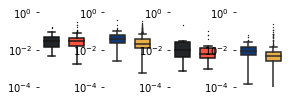

In [137]:
fig, axs = plt.subplots(1,4, figsize=functions.set_size('thesis', fraction=.75, subplots=(2, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.3)
axs = axs.ravel()

df2 = df[df.type == 'excitatory']

sns.set_palette(sns.color_palette([group_colors['controlca1'],group_colors['paeca1']]))
g=sns.boxplot(x="group", y="trans_prob", data=df2[(df2.area=='ca1')],
            width=.6,ax=axs[0],saturation=1,fliersize=.5)
axs[0].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)


sns.set_palette(sns.color_palette([group_colors['controlca3'],group_colors['paeca3']]))
g=sns.boxplot(x="group", y="trans_prob", data=df2[(df2.area=='ca3')],
            width=.6,ax=axs[1],saturation=1,fliersize=.5)
axs[1].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)
sns.despine(trim=True, left=True, bottom=True)


df2 = df[df.type == 'inhibitory']

sns.set_palette(sns.color_palette([group_colors['controlca1'],group_colors['paeca1']]))
g=sns.boxplot(x="group", y="trans_prob", data=df2[(df2.area=='ca1')],
            width=.6,ax=axs[2],saturation=1,fliersize=.5)
# sns.stripplot(x="group", y="trans_prob", data=df2[(df2.area=='ca1')],
#               size=4, color="green", linewidth=0,alpha=.5,ax=axs[2])
axs[2].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)


sns.set_palette(sns.color_palette([group_colors['controlca3'],group_colors['paeca3']]))
g=sns.boxplot(x="group", y="trans_prob", data=df2[(df2.area=='ca3')],
            width=.6,ax=axs[3],saturation=1,fliersize=.5)

axs[3].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)
sns.despine(trim=True, left=True, bottom=True)

# apply log transform
temp_trans_prob = np.log(df2.trans_prob)
temp_trans_prob = temp_trans_prob[~np.isinf(temp_trans_prob) & ~np.isnan(temp_trans_prob)]

for i in range(4):
    axs[i].set_yscale("log")
    
for i in range(4):
#     axs[i].set_ylim(temp_trans_prob.min(),temp_trans_prob.max())
    axs[i].set_ylim(0.0001,1)


plt.savefig(os.path.join(fig_save_path,'trans_prob_box.svg'),dpi=300,bbox_inches='tight')

## get proportions of excitatory to inhibitory 

,session,rat,group,area,prop_excitatory,n_events
0,LEM3116_S20180715121821,LEM3116,control,ca1,1.000000,2
1,LEM3116_S20180716174306,LEM3116,control,ca1,1.000000,1
2,LEM3116_S20180717110938,LEM3116,control,ca1,1.000000,28
3,LEM3116_S20180717203042,LEM3116,control,ca1,1.000000,10
4,LEM3116_S20180718184628,LEM3116,control,ca1,0.428571,7


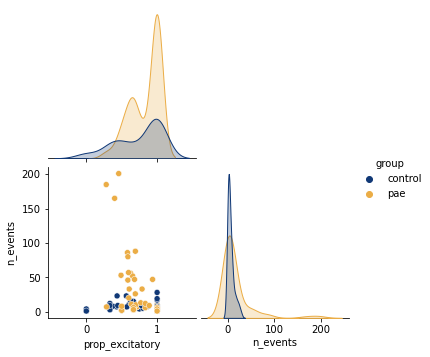

In [151]:

n_events = []
prop_excitatory = []
df['session_area'] = df.session+df.area
for session in pd.unique(df.session_area):
    n_sig = sum(df.type[df.session_area == session] == 'excitatory')
    n_events.append((df.session_area == session).sum())
    prop_excitatory.append(n_sig / n_events[-1])
    
prop_df = pd.DataFrame()

prop_df['session'] = pd.unique(df.session_area)

rat = [s.split('_')[0] for s in prop_df.session]
prop_df['rat']=rat
prop_df = add_group_affiliation(prop_df)
prop_df['area'] = prop_df.session.map(lambda x: str(x)[-3:])
prop_df['session'] = prop_df.session.map(lambda x: str(x)[:-3])

prop_df['prop_excitatory'] = prop_excitatory
prop_df['n_events'] = n_events

sns.pairplot(prop_df,hue="group",corner=True)   
display(prop_df.head())

prop_df.to_csv(r'F:\Projects\PAE_PlaceCell\analysis\monosynaptic\post_processed\prop_df.csv')

## Get numbers of pre / post synaptic partners

In [4]:
df2 = df[(df.area_ref== 'ca1') | (df.area_ref== 'ca3') | (df.area_target== 'ca1') | (df.area_target== 'ca3')]

In [170]:
post_partners = []
post_partners_session = []
post_partners_area = []
post_partners_cell_type = []

pre_partners = []
pre_partners_session = []
pre_partners_area = []
pre_partners_cell_type = []

for session in df2.session.unique():
    curr_sess = df2[(df2.session == session)]
    # post synaptic partners
    for ref in curr_sess.ref.unique():
        post_partners.append(sum(curr_sess.ref == ref))
        post_partners_session.append(session)
        post_partners_area.append(curr_sess[curr_sess.ref == ref].area_ref.iloc[0])
        post_partners_cell_type.append(curr_sess[curr_sess.ref == ref].cell_type_ref.iloc[0])

    for target in curr_sess.target.unique():
        pre_partners.append(sum(curr_sess.target == target))    
        pre_partners_session.append(session)
        pre_partners_area.append(curr_sess[curr_sess.target == target].area_target.iloc[0])
        pre_partners_cell_type.append(curr_sess[curr_sess.target == target].cell_type_target.iloc[0])


In [171]:
def add_group_affiliation(df):
    control=('RH13','RH14','LS21','LS23','LE2821','LE2823','LEM3116','LEM3120','LEM3216')
    pae=('RH11','RH16','LS17','LS19','LE2813','LEM3124','LEM3206','LEM3246')

    df['group'] = np.ones_like(df.session)

    regstr = '|'.join(control)
    idx = df['session'].str.upper().str.contains(regstr)    
    df.loc[idx,'group'] = 'control'

    regstr = '|'.join(pae)
    idx = df['session'].str.upper().str.contains(regstr)    
    df.loc[idx,'group'] = 'pae'
    return df

post_df = pd.DataFrame()
post_df['session'] = post_partners_session
rat = [s.split('_')[0] for s in post_df.session]
post_df['rat']=rat
post_df = add_group_affiliation(post_df)
post_df['area'] = post_partners_area
post_df['cell_type'] = post_partners_cell_type
post_df['n_partners'] = post_partners
display(post_df.head())


pre_df = pd.DataFrame()
pre_df['session'] = pre_partners_session
rat = [s.split('_')[0] for s in pre_df.session]
pre_df['rat']=rat
pre_df = add_group_affiliation(pre_df)
pre_df['area'] = pre_partners_area
pre_df['cell_type'] = pre_partners_cell_type
pre_df['n_partners'] = pre_partners
display(post_df.head())

,session,rat,group,area,cell_type,n_partners
0,LEM3116_S20180715121821,LEM3116,control,ca1,pyr,1
1,LEM3116_S20180715121821,LEM3116,control,ca1,pyr,1
2,LEM3116_S20180716174306,LEM3116,control,ca1,pyr,1
3,LEM3116_S20180717110938,LEM3116,control,ca1,pyr,1
4,LEM3116_S20180717110938,LEM3116,control,ca1,pyr,2


,session,rat,group,area,cell_type,n_partners
0,LEM3116_S20180715121821,LEM3116,control,ca1,pyr,1
1,LEM3116_S20180715121821,LEM3116,control,ca1,pyr,1
2,LEM3116_S20180716174306,LEM3116,control,ca1,pyr,1
3,LEM3116_S20180717110938,LEM3116,control,ca1,pyr,1
4,LEM3116_S20180717110938,LEM3116,control,ca1,pyr,2


In [217]:
pre_df.to_csv(r'F:\Projects\PAE_PlaceCell\analysis\monosynaptic\post_processed\pre_df.csv')
post_df.to_csv(r'F:\Projects\PAE_PlaceCell\analysis\monosynaptic\post_processed\post_df.csv')

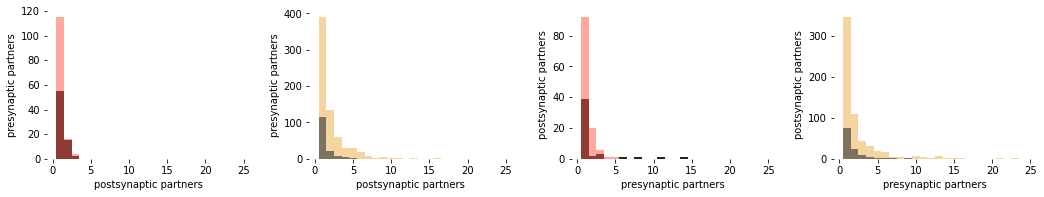

In [218]:
fig, axs = plt.subplots(1,4, figsize=functions.set_size('thesis', fraction=3, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.3)
axs = axs.ravel()

axs[0].hist(post_df.n_partners[(post_df.group == 'control') & (post_df.area == 'ca1')],bins=np.arange(.5,25),color=group_colors['controlca1'])
axs[0].hist(post_df.n_partners[(post_df.group == 'pae') & (post_df.area == 'ca1')],bins=np.arange(.5,25),color=group_colors['paeca1'],alpha=.5)
axs[0].set_xlabel('postsynaptic partners')
axs[0].set_ylabel('presynaptic partners')

axs[1].hist(post_df.n_partners[(post_df.group == 'control') & (post_df.area == 'ca3')],bins=np.arange(.5,25),color=group_colors['controlca3'])
axs[1].hist(post_df.n_partners[(post_df.group == 'pae') & (post_df.area == 'ca3')],bins=np.arange(.5,25),color=group_colors['paeca3'],alpha=.5)
axs[1].set_xlabel('postsynaptic partners')
axs[1].set_ylabel('presynaptic partners')

axs[2].hist(pre_df.n_partners[(pre_df.group == 'control') & (pre_df.area == 'ca1')],bins=np.arange(.5,25),color=group_colors['controlca1'])
axs[2].hist(pre_df.n_partners[(pre_df.group == 'pae') & (pre_df.area == 'ca1')],bins=np.arange(.5,25),color=group_colors['paeca1'],alpha=.5)
axs[2].set_ylabel('postsynaptic partners')
axs[2].set_xlabel('presynaptic partners')

axs[3].hist(pre_df.n_partners[(pre_df.group == 'control') & (pre_df.area == 'ca3')],bins=np.arange(.5,25),color=group_colors['controlca3'])
axs[3].hist(pre_df.n_partners[(pre_df.group == 'pae') & (pre_df.area == 'ca3')],bins=np.arange(.5,25),color=group_colors['paeca3'],alpha=.5)
axs[3].set_ylabel('postsynaptic partners')
axs[3].set_xlabel('presynaptic partners')

sns.despine(trim=True, left=True, bottom=True)


## Chord diagrams of protein interaction networks in Python

https://towardsdatascience.com/chord-diagrams-of-protein-interaction-networks-in-python-9589affc8b91

In [8]:
### The required libraries and packages ###
import networkx as nx
from nxviz.plots import CircosPlot

### make network plot

In [124]:
session = 'LEM3116_S20180717110938'
# session = 'LEM3206_S20190718143924'
curr_sess = df2[(df2.session == session)]

interactions = curr_sess[['ref','target','trans_prob']]

interactions['ref'] = interactions['ref'].astype(str)
interactions['target'] = interactions['target'].astype(str)

<ipython-input-124-e2c613342067>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions['ref'] = interactions['ref'].astype(str)
<ipython-input-124-e2c613342067>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions['target'] = interactions['target'].astype(str)


In [125]:
G=nx.Graph(name='network')
interactions = np.array(interactions) # convert to array for clarity
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] 
    b = interaction[1] 
    w = interaction[2] # score as weighted edge
    # To include all the weighted connections|, uncomment the following line
    G.add_weighted_edges_from([(a,b,w)])

In [126]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax,rnd=False):
    arr = list(l)
    return [round((x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin,2) for x in arr]

nodelist = [n for n in G.nodes]
ws = rescale([float(G[u][v]['weight']) for u,v in G.edges],1,10) # can change line thickness by the rescale factor
edgelist = [(str(u),str(v),{"weight":ws.pop(0)}) for u,v in G.edges]

# create new graph using nodelist and edgelist
g = nx.Graph(name='network')
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)
# go through nodes in graph G and store their degree as "class" in graph g
for v in G:
    if any(v == curr_sess.ref.astype(str)):
        g.nodes[v]["class"] = np.array((curr_sess.cell_type_ref[v == curr_sess.ref.astype(str)] == 'pyr')*1)[0]
    elif any(v == curr_sess.target.astype(str)):
        g.nodes[v]["class"] = np.array((curr_sess.cell_type_target[v == curr_sess.target.astype(str)] == 'pyr')*1)[0]


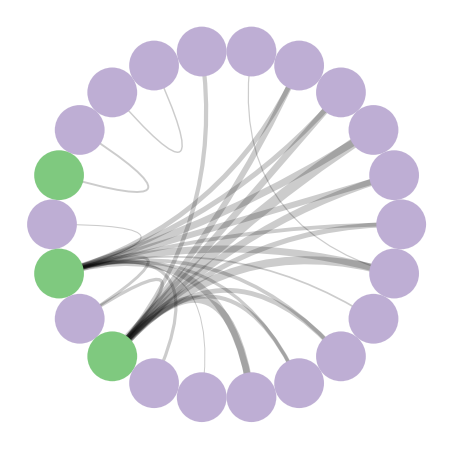

In [127]:
c = CircosPlot(graph=g,figsize=(8, 8), node_color="class",
               edge_width="weight")
c.draw()